Autoencoder is an unsupervised artificial neural network that is trained to copy its input to output. In the case of image data, the autoencoder will first encode the image into a lower-dimensional representation, then decodes that representation back to the image.

In [1]:
import numpy 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist

Split our MNIST data into two parts:
Training Dataset: 60,000 data points belong to the training dataset, and
Testing Dataset: 10,000 data points belongs to the test dataset.

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

It indicates that we have 60,000 training images and each consists of 28 by 28 pixels.

#Plot Images as a Grey Scale Image

We plot some of the images from our dataset using the matplotlib library, and specifically using the subplot function of the matplotlib library to plot more than one image simultaneously.

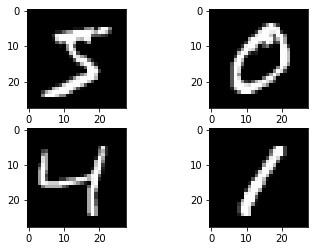

In [4]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

#Formatting Data for Keras

The data should always be of the format “(Number of data points, data point dimension)”. In this case, the training data will be of format 60,000×784.

In [5]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train = X_train / 255
X_test = X_test / 255

In [6]:
X_train.shape

(60000, 784)

#Adding Noise to Images

Here we will feed the original images as input and we get the noisy images as output and our model (i.e, autoencoder) will learn the relationship between a clean image and a noisy image and learn how to clean a noisy image.
The noise factor is multiplied with a random matrix that has a mean of 0.0 and a standard deviation of 1.0. This matrix will draw samples from a normal (Gaussian) distribution. While adding the noise, we have to remember that the shape of the random normal array will be similar to the shape of the data you will be adding the noise.

In [7]:
noise_factor = 0.2
x_train_noisy = X_train + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
x_test_noisy = X_test + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
x_train_noisy = numpy.clip(x_train_noisy, 0., 1.)
x_test_noisy = numpy.clip(x_test_noisy, 0., 1.)

To ensure that our final images array item values are within the range of 0 to 1, we may use np.clip method. The clip is a Numpy function that clips the values outside of the Min-Max range and replaces them with the designated min or max value.

#Defining an Encoder-Decoder network

It will have an input layer of 784 neurons since we have an image size of 784 due to 28 by 28 pixels present (i.e. we have the input dimension and an output layer of 784 neurons).

In [8]:
# create model
model = Sequential()
model.add(Dense(500, input_dim=num_pixels, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(784, activation='sigmoid'))

While compiling we provide the loss function to be used, the optimizer, and any metric. Here we use an Adam optimizer and Mean Squared Error for our model.

In [9]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

#Training or Fitting the model

In [10]:
# Training model
model.fit(x_train_noisy, X_train, validation_data=(x_test_noisy, X_test), epochs=2, batch_size=200)

Epoch 1/2
300/300 [==============================] - 13s 38ms/step - loss: 0.0403 - val_loss: 0.0192
Epoch 2/2
300/300 [==============================] - 13s 44ms/step - loss: 0.0161 - val_loss: 0.0133


#Evaluating the model

In [11]:
# Final evaluation of the model
pred = model.predict(x_test_noisy)

313/313 [==============================] - 2s 5ms/step


Test Images


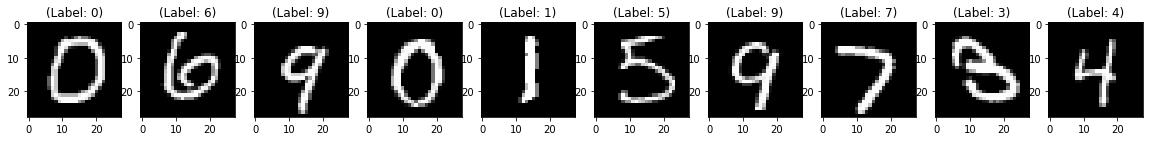

Test Images with Noise


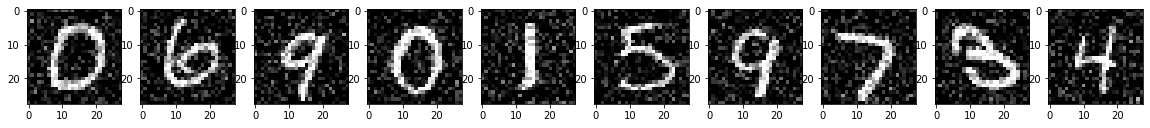

Reconstruction of Noisy Test Images


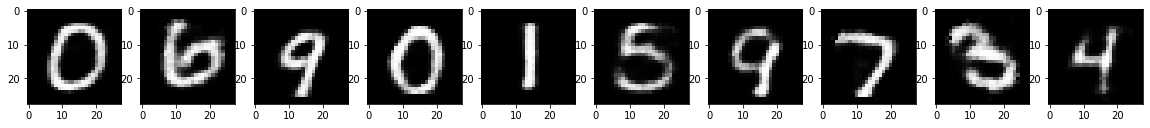

In [12]:
X_test = numpy.reshape(X_test, (10000,28,28)) *255
pred = numpy.reshape(pred, (10000,28,28)) *255
x_test_noisy = numpy.reshape(x_test_noisy, (-1,28,28)) *255
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i,:,:], cmap='gray')
    curr_lbl = y_test[i]
    plt.title("(Label: " + str(curr_lbl) + ")")
plt.show()    
plt.figure(figsize=(20, 4))
print("Test Images with Noise")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_noisy[i,:,:], cmap='gray')
plt.show()    
plt.figure(figsize=(20, 4))
print("Reconstruction of Noisy Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i,:,:], cmap='gray')  
plt.show()

The first row is for original test images,
The second row is for noisy images, and
The third row is for cleaned (reconstructed) images.